In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img

In [5]:
# filtered_data = df.apply(lambda x: medfilt(x, kernel_size=5))
# clipped_data = filtered_data.clip(0, 1500).to_numpy().transpose()

In [6]:
emgs=np.char.add('emg', np.arange(0, 8).astype(str))

In [99]:
def preprocess_data(path):
    df = pd.read_csv(path, index_col=0)
    # clip
    df[emgs] = df[emgs].clip(0, 1500)
    # normalization
    df[emgs] = df[emgs].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return df

def df_to_coactivation_map(df, metric='mean'):
    df_melt = df[np.append(['gt'], emgs)].melt(id_vars='gt',value_vars=emgs,var_name='emg')
    coactivation_map = df_melt.groupby(['gt','emg']).apply(metric).reset_index().pivot(index='gt', columns='emg', values='value')
    return coactivation_map

def plot_coactivation_map(coactivation_map, path):
    fig, ax = plt.subplots()
    ax.imshow(coactivation_map, cmap='Blues')
    ax.set_xticks(np.arange(len(emgs)), labels=emgs)
    ax.set_yticks([0,1,2], labels=['relax','open','close'])
    ax.set_title(path)
    return 


def visualize_subject(path):
    plt.imshow(img.imread('plots/' + path[15:] + '.png'))
    plt.axis('off') 
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()


def quick_plot(path):
    df = preprocess_data(path)
    cm = df_to_coactivation_map(df, metric='mean')
    visualize_subject(path)
    plot_coactivation_map(cm, path)

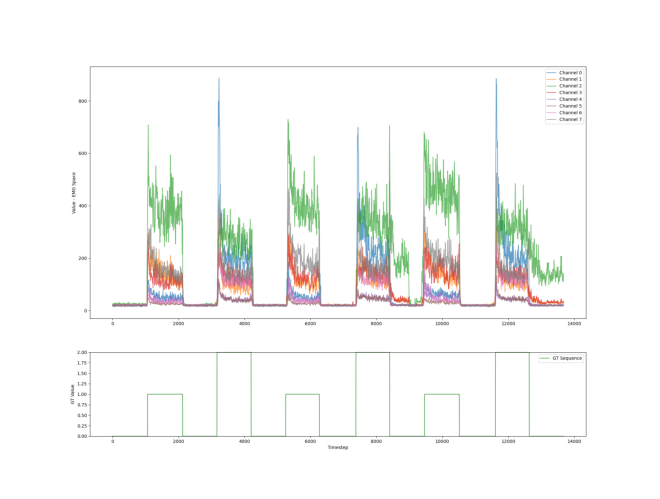

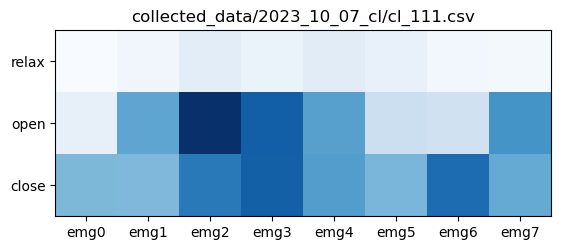

In [100]:
quick_plot('collected_data/2023_10_07_cl/cl_111.csv')

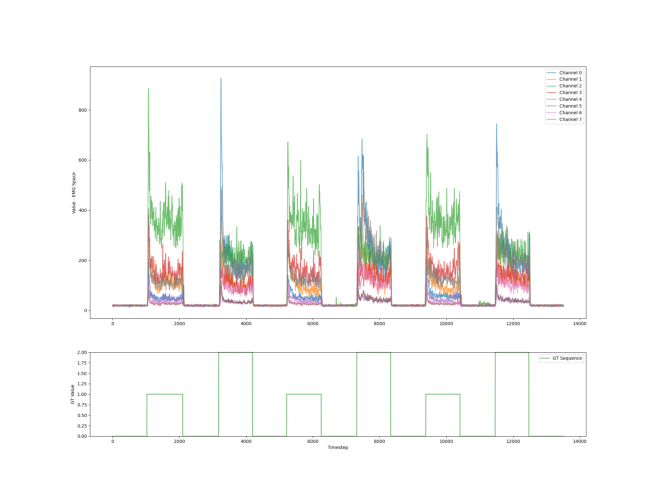

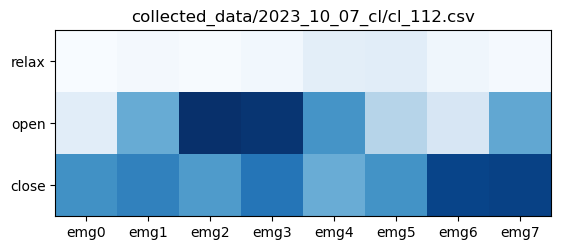

In [101]:
quick_plot('collected_data/2023_10_07_cl/cl_112.csv')

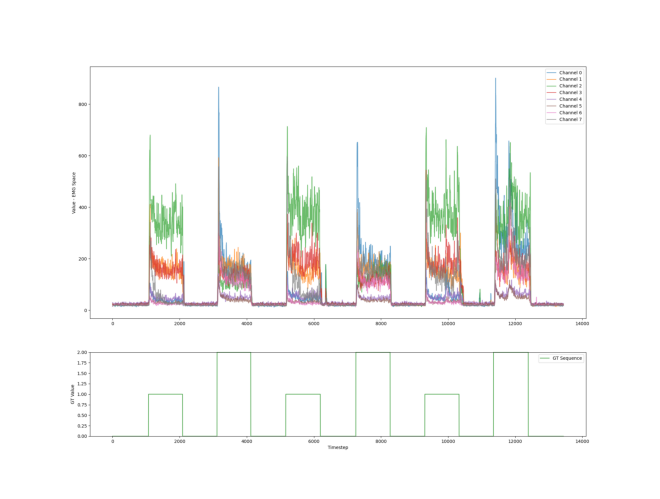

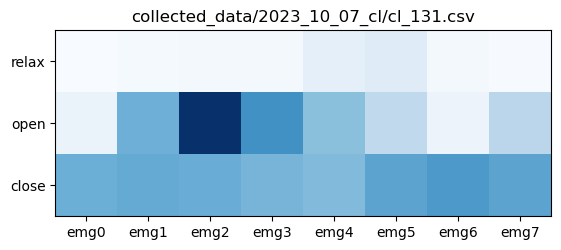

In [102]:
quick_plot('collected_data/2023_10_07_cl/cl_131.csv')

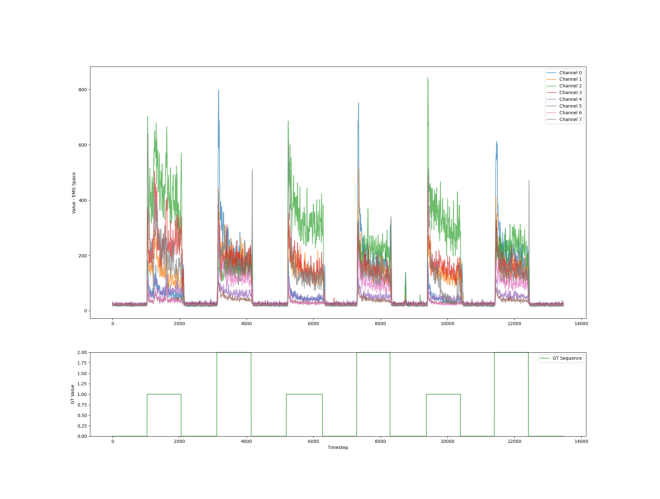

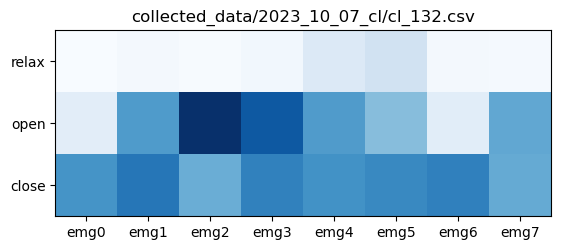

In [103]:
quick_plot('collected_data/2023_10_07_cl/cl_132.csv')

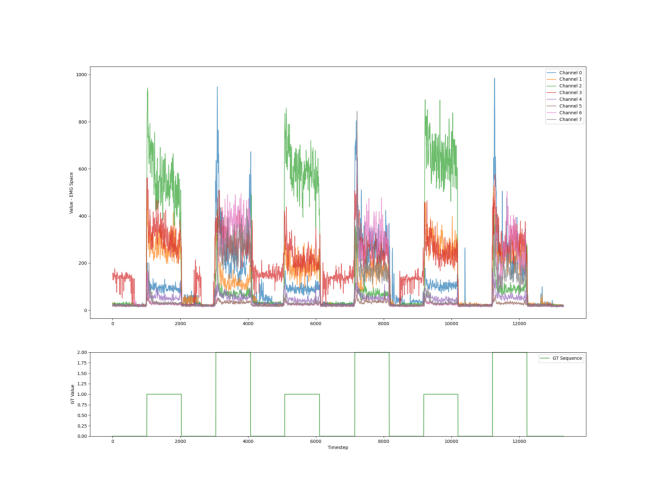

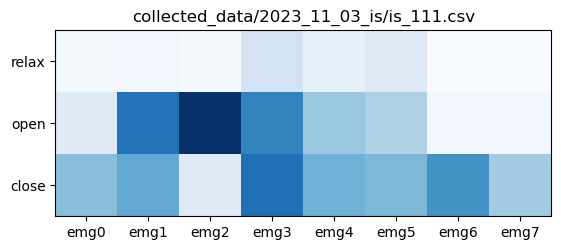

In [104]:
quick_plot('collected_data/2023_11_03_is/is_111.csv')

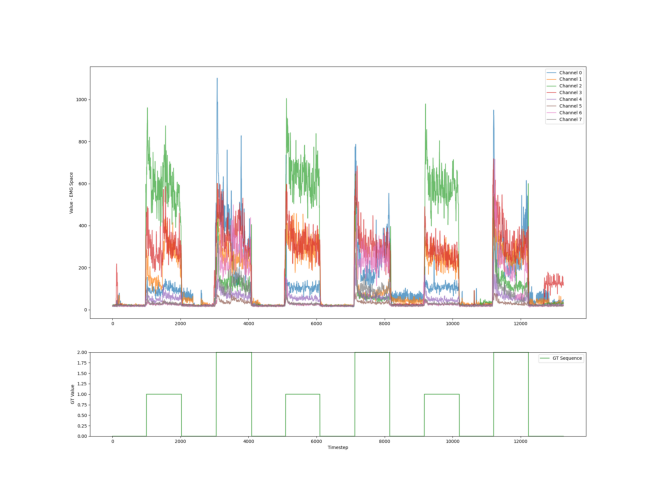

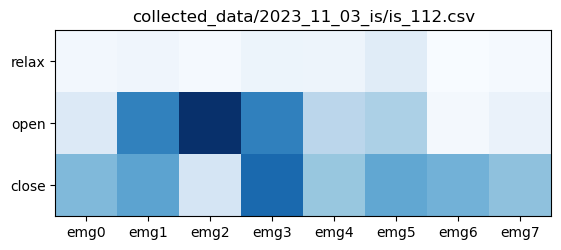

In [105]:
quick_plot('collected_data/2023_11_03_is/is_112.csv')

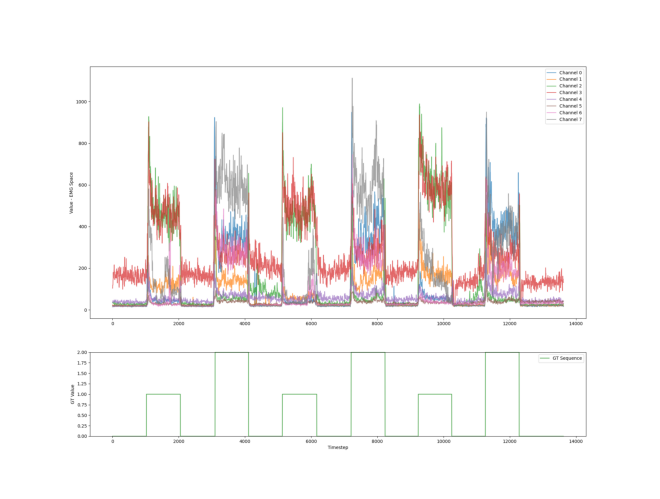

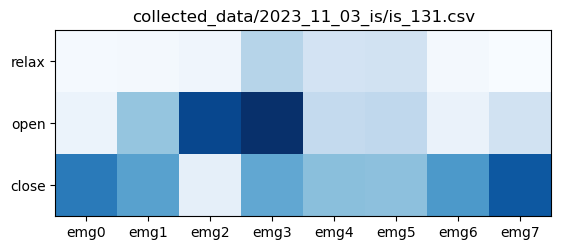

In [106]:
quick_plot('collected_data/2023_11_03_is/is_131.csv')

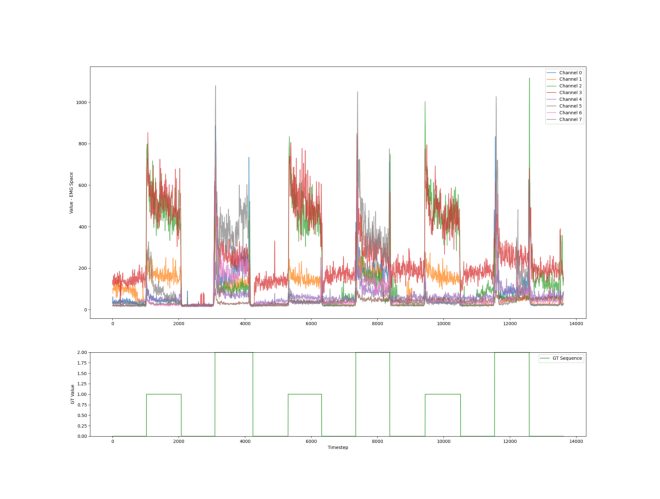

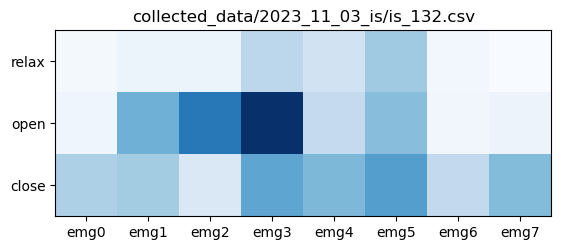

In [107]:
quick_plot('collected_data/2023_11_03_is/is_132.csv')

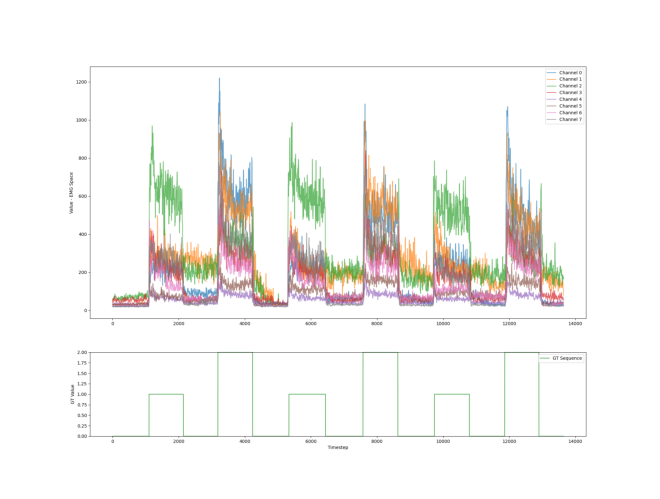

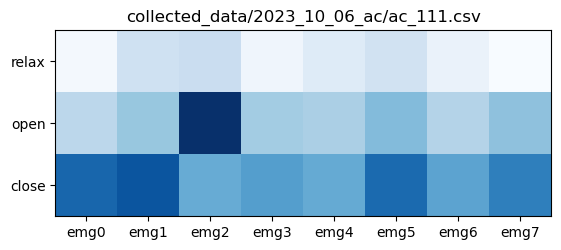

In [108]:
quick_plot('collected_data/2023_10_06_ac/ac_111.csv')

# stroke

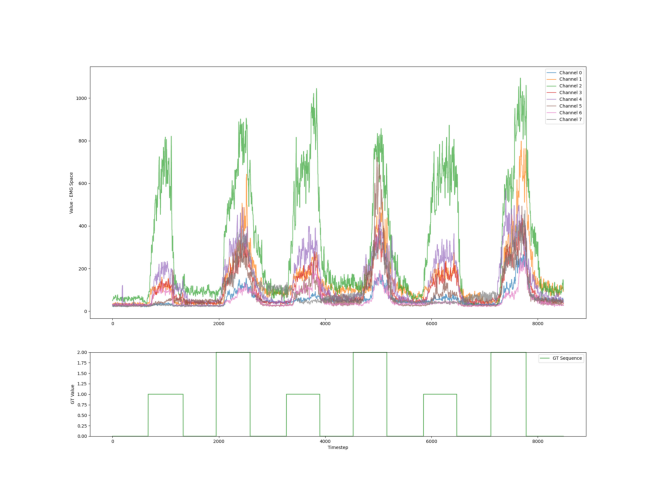

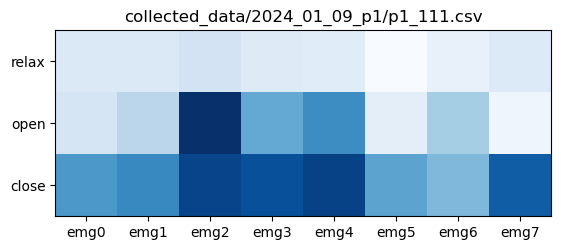

In [109]:
quick_plot('collected_data/2024_01_09_p1/p1_111.csv')

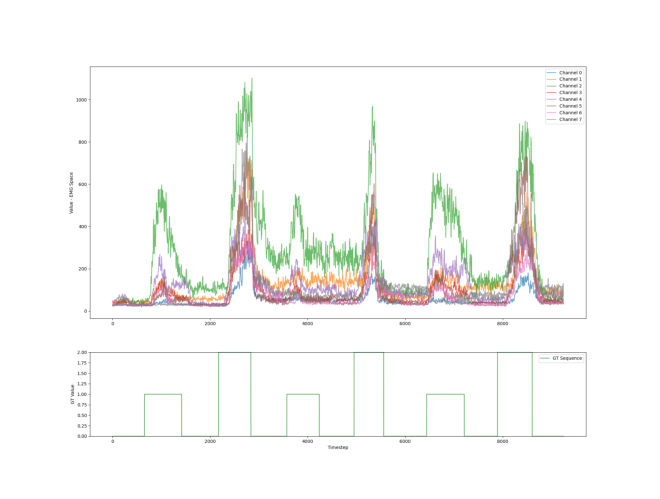

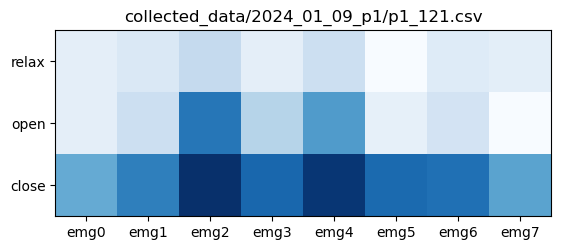

In [110]:
quick_plot('collected_data/2024_01_09_p1/p1_121.csv')

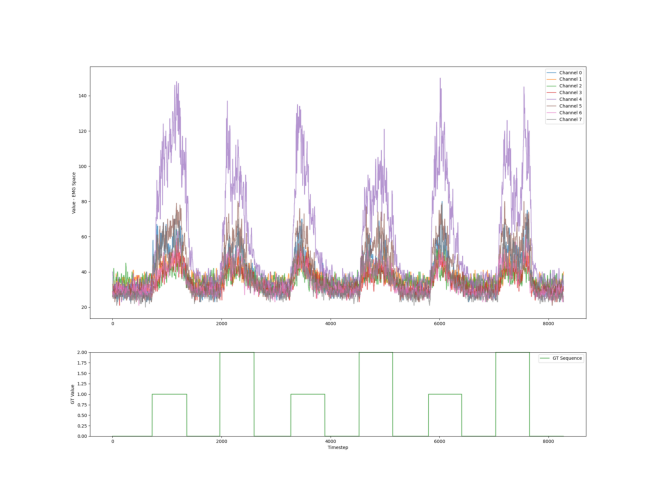

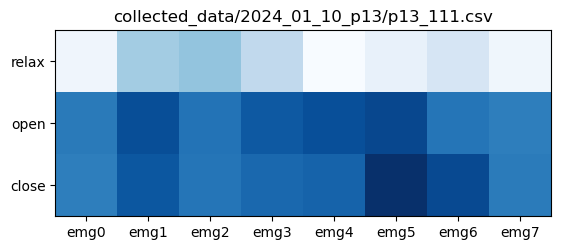

In [111]:
quick_plot('collected_data/2024_01_10_p13/p13_111.csv')

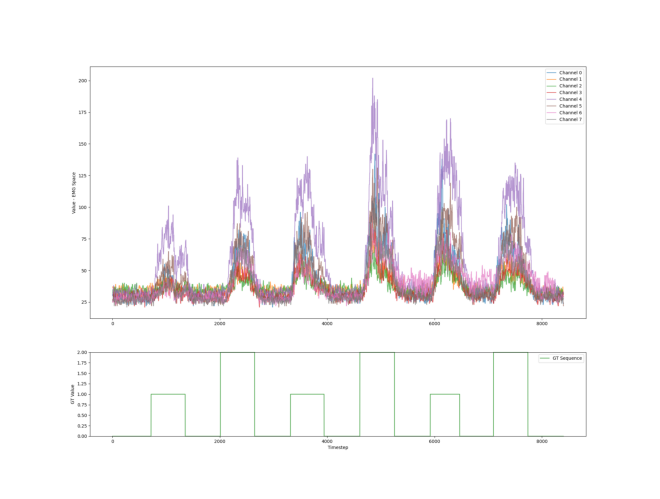

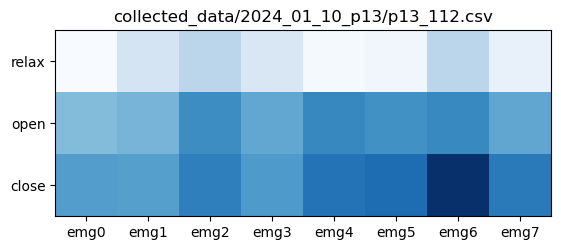

In [112]:
quick_plot('collected_data/2024_01_10_p13/p13_112.csv')